<a href="https://colab.research.google.com/github/Funmiadebajo/GIS/blob/main/Municipalities.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

My first reaction to Homelessness was shock, then fear, then anger and then empathy. Having worked with vulnerable people over the past few years, I decided to study homelessness and relate it to my area of iinterest which is education and poverty in urban spaces.

My research aims to provide valuable insights into the intricate relationship between educational attainment and homelessness in Camden. As one of the poorest cities in the U.S., Camden’s high rates of poverty, unemployment, and housing instability contribute significantly to its homelessness crisis.

My goal is to  research how educational attainment of camden residents relate to the homelessness rates in the community;  And to what extent does a lack of educational qualifications (e.g., high school diploma or GED) increase the risk of homelessness.



In [1]:
%%capture
!pip install geopandas==1.0.1
!pip install mapclassify

In [2]:
import os, zipfile #basics
import pandas as pd #data management
import matplotlib.pyplot as plt #vis

import geopandas as gpd #gis/maps

import mapclassify #need for thematic map classification

#will display all output not just last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from google.colab import files #to download from colab onto hd

from google.colab import data_table
data_table.enable_dataframe_formatter() #this enables spreadsheet view upon calling dataframe (without() )

In [3]:
#!python --version
gpd.__version__

'1.0.1'

### Mapping Counties in New Jersey

In [25]:
! wget -q -O Municipalities.zip https://www2.census.gov/geo/tiger/TIGER2021/COUNTY/tl_2021_us_county.zip

# Unzipping the 'Municipalities.zip' file
zip_ref = zipfile.ZipFile('Municipalities.zip', 'r')
zip_ref.extractall()  # Extracts all the files from the zip
zip_ref.close()  # Closes the zip file after extraction

# Load the shapefile 'Municipalities.shp' into a GeoDataFrame using geopandas
njMun = gpd.read_file('Municipalities.shp')

Text(0.5, 1.0, 'New Jersey Municipalities')

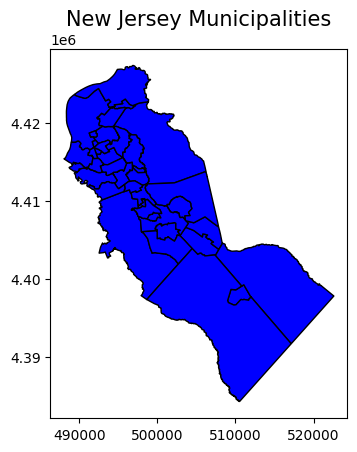

In [23]:

# Make the map with specified color and edgecolor
ax = njMun.plot(color='blue', edgecolor='black')
# Add title and remove axis
ax.set_title('New Jersey Municipalities', fontsize=15)
ax.set_axis_on()

In [6]:
njMun.dtypes

,0
FID,int32
COUSUBNS,object
GEOID,object
NAMELSAD,object
CLASSFP,object
FUNCSTAT,object
ALAND,int32
AWATER,int32
INTPTLAT,object
INTPTLON,object


In [22]:
import pandas as pd
import geopandas as gpd
import zipfile

# Download the zip file and save it
! wget -q -O Municipalities.zip https://github.com/Funmiadebajo/GIS/raw/refs/heads/main/Municipalities.zip

# Unzipping the 'Municipalities.zip' file
zip_ref = zipfile.ZipFile('Municipalities.zip', 'r')
zip_ref.extractall()  # Extracts all the files from the zip
zip_ref.close()  # Closes the zip file after extraction

# Load the shapefile 'Municipalities.shp' into a GeoDataFrame using geopandas
njMun = gpd.read_file('Municipalities.shp')

# Download the population Excel file
Pop = pd.read_excel('https://github.com/Funmiadebajo/GIS/raw/refs/heads/main/municipality%20population.xlsx')

# Check column names
print("njMun columns:", njMun.columns)
print("Pop columns:", Pop.columns)

# Ensure both DataFrames have the same column name and correct case
njMun.rename(columns={'County': 'COUNTY'}, inplace=True)  # Adjust this if the column name differs
Pop.rename(columns={'County': 'COUNTY'}, inplace=True)    # Adjust this if the column name differs

# Ensure the COUNTY column data types match
njMun['COUNTY'] = njMun['COUNTY'].astype(str)
Pop['COUNTY'] = Pop['COUNTY'].astype(str)

# Perform the merge
njMun1 = pd.merge(njMun, Pop, on='COUNTY', how='outer', indicator=True)

# Ensure the result is still a GeoDataFrame
if 'geometry' in njMun1.columns:
    njMun1 = gpd.GeoDataFrame(njMun1, geometry='geometry')

# Display the merged GeoDataFrame
print(njMun1.head())  # Show the first few rows of the merged GeoDataFrame
print(njMun1.info())  # Show information about the merged GeoDataFrame

njMun columns: Index(['FID', 'COUSUBNS', 'GEOID', 'NAMELSAD', 'CLASSFP', 'FUNCSTAT', 'ALAND',
       'AWATER', 'INTPTLAT', 'INTPTLON', 'Shape_Leng', 'GEOCODE', 'GlobalID',
       'Shape__Are', 'Shape__Len', 'geometry'],
      dtype='object')
Pop columns: Index(['Municipality', 'population'], dtype='object')


KeyError: 'COUNTY'

In [20]:
njMun1 = pd.merge(njMun, Pop, on='Municipalities',how='outer',indicator=True) #(make sure to have njMun shapefile from previous sec)



KeyError: 'Municipalities'